# Linear Reg with Mini Batch Stochastic Gradient Descent


REFERENCES

https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/

https://realpython.com/gradient-descent-algorithm-python/

https://towardsdatascience.com/implementing-sgd-from-scratch-d425db18a72c

https://www.pyimagesearch.com/2016/10/17/stochastic-gradient-descent-sgd-with-python/

https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/?ref=rp



## Gradient Descent and its Variants 


**Basic Concept**

In machine learning, gradient descent is an optimization technique used for computing the model parameters (coefficients and bias) for algorithms like linear regression, logistic regression, neural networks, etc. In this technique, we repeatedly iterate through the training set and update the model parameters in accordance with the gradient of error with respect to the training set.

**Types of Gradient descent**

- **Batch Gradient Descent :**

     - Parameters are updated after computing the gradient of error with respect to the entire training set
     - Since entire training data is considered before taking a step in the direction of gradient, therefore it takes a lot of time for making a single update.
    - It makes smooth updates in the model parameters

- **Stochastic Gradient Descent:** 

     - Parameters are updated after computing the gradient of error with respect to a single training example
     - Since only a single training example is considered before taking a step in the direction of gradient, we are forced to loop over the training set and thus cannot exploit the speed associated with vectorizing the code.
     - It makes very noisy updates in the parameters
     
- **Mini-Batch Gradient Descent:** 

     - Parameters are updated after computing the gradient of error with respect to a subset of the training set
     - Since a subset of training examples is considered, it can make quick updates in the model parameters and can also exploit the speed associated with vectorizing the code.
     - Depending upon the batch size, the updates can be made less noisy – greater the batch size less noisy is the update

### The Stochastic Concept vis a vis Plain Batch Gradient Descent 

**Stochastic**
The word ‘stochastic‘ means a system or a process that is linked with a random probability. Hence, in Stochastic Gradient Descent, a few samples are selected randomly instead of the whole data set for each iteration. 

**Batch**
In Gradient Descent, there is a term called “batch” which denotes the total number of samples from a dataset that is used for calculating the gradient for each iteration. 

In typical Gradient Descent optimization, like Batch Gradient Descent, the batch is taken to be the whole dataset. Although, using the whole dataset is really useful for getting to the minima in a less noisy and less random manner, but the problem arises when our datasets gets big.

**Why Batch is inefficient for large data sets**
Suppose, you have a million samples in your dataset, so if you use a typical Gradient Descent optimization technique, you will have to use all of the one million samples for completing one iteration while performing the Gradient Descent, and it has to be done for every iteration until the minima is reached. Hence, it becomes computationally very expensive to perform.

**Stochastic Gradient Descent to the rescue**
This problem is solved by Stochastic Gradient Descent. In SGD, it uses only a single sample, i.e., a batch size of one, to perform each iteration. The sample is randomly shuffled and selected for performing the iteration.

**SGD : Noisy but faster?**
So, in SGD, we find out the gradient of the cost function of a single example at each iteration instead of the sum of the gradient of the cost function of all the examples.

In SGD, since only one sample from the dataset is chosen at random for each iteration, the path taken by the algorithm to reach the minima is usually noisier than your typical Gradient Descent algorithm. But that doesn’t matter all that much because the path taken by the algorithm does not matter, as long as we reach the minima and with significantly shorter training time.

**Balance between speed and Noise?**
The mini-batch gradient descent makes a compromise between the speedy convergence and the noise associated with gradient update which makes it a more flexible and robust algorithm.

### The Mini Batch Algorithm 

Let theta = model parameters and max_iters = number of epochs.

for itr = 1, 2, 3, …, max_iters:

      Select Randomly a Batch of 'K= batch size') 
      for mini_batch (X_mini, y_mini):

**Forward Pass on the batch X_mini:**

  Make predictions on the mini-batch
  
  Compute error in predictions (J(theta)) with the current values of the parameters
  
**Backward Pass:**

  Compute gradient(theta) = partial derivative of J(theta) w.r.t. theta
  
  Update parameters:
  theta = theta – learning_rate*gradient(theta)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Data Preparation 

**References**
https://www.geeksforgeeks.org/ml-mini-batch-gradient-descent-with-python/

https://medium.com/data-science-365/linear-regression-with-gradient-descent-895bb7d18d52


In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


The Advertising dataset captures sales revenue generated with respect to advertisement spends across multiple channels like radio, TV and newspaper. As you can see, there are four columns in the dataset. Since our problem definition involves only sales and TV columns in the dataset, we do not need radio and newspaper columns. 

In [3]:
# drop unwanted columns 
df.drop(columns=['Radio','Newspaper'],inplace=True)
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

### Parameter Initialization 

We know that equation of a simple linear regression is expressed as:

$$ \hat{y} = mx + b  $$

Thus, we have two parameters $m$ and $b$.  We store both of these parameter $m$ and $b$ in an array called theta. First, we initialize theta with zeros

In [7]:
# define X, Y , Theta 
#---------------------------
N = df['Sales'].values.size  # number of observations 
x = np.append(np.ones((N,1)),df['TV'].values.reshape(N,1),axis=1)
y = df['Sales'].values.reshape(N,1)
theta = np.zeros((2,1))


In [8]:
# test train split
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 2) (40, 2) (160, 1) (40, 1)


### Loss function 


Mean Squared Error (MSE) of Regression is given as:

$$J=\frac{1}{2N} \sum_{i=1}^{N}(y-\hat{y})^{2} -- (2) $$


Where $N$ is the number of training samples, $y$ is the actual value and $\hat{y}$ is the predicted value.

The above loss function can be implemented as:

We feed the data and the model parameter theta to the loss function which returns the MSE. Remember, data[,0] has $x$ value and data[,1] has $y$ value. Similarly, theta [0] has a value of $m$ and theta[1] has a value of $b$. 

In [31]:
#define predict function 
def predict(x,theta):
    y_pred = np.dot(x,theta)
    return y_pred

In [32]:
# define loss function 
def mse_loss(x,Y,theta):
    y_pred = np.dot(x,theta)
    sqrd_err = (Y - y_pred)**2
    loss = (1/(2*N))*np.sum(sqrd_err)
    return loss 


Now, we need to minimize this loss. In order to minimize the loss, we need to calculate the gradient of the loss function $J$ with respect to the model parameters $m$ and $b$ and update the parameter according to the parameter update rule. So, first, we will calculate the gradient of the loss function.


**NOTE**
For Mini Batch Gradient Descent : The summation is for all rows for the mini batch chosen currently 


### Gradients of Loss Function 


Gradients of loss function $J$ with respect to parameter $m$ is given as:


$$ \frac{d J}{d m}=\frac{2}{N} \sum_{i=1}^{N}-x_{i}\left(y_{i}-\left(m x_{i}+b\right)\right) -- (3) $$


Gradients of loss function $J$ with respect to parameter $b$ is given as:


$$ \frac{d J}{d b}=\frac{2}{N} \sum_{i=1}^{N}-\left(y_{i}-\left(m x_{i}+b\right)\right) -- (4) $$





### Update Rule

After computing gradients we need to update our model paramater according to our update rule as given below:

$$m=m-\alpha \frac{d J}{d m} -- (5) $$ 

$$ b=b-\alpha \frac{d J}{d b} --(6) $$


Since we stored $m$ in theta[0] and $b$ in theta[1], we can write our update equation as: 

$$\theta = \theta - \alpha \frac{dJ}{d\theta} -- (7) $$

As we learned in the previous section, updating gradients for just one time will not lead us to the convergence i.e minimum of the cost function, so we need to compute gradients and the update the model parameter for several iterations:

### Defining the Stochastic Gradient Descent function 

In [109]:
def Stochastic_Gradient_Desc(x,Y,learn_rate=0.000068,num_iter=400000,batch_size=64):
    losses = []
    theta = np.zeros((2,1))
    temp_data = np.hstack((x,Y))
    np.random.shuffle(temp_data)
    for i in range(num_iter):
        # Randomly Select a batch from temp_data 
        number_of_rows = temp_data.shape[0]
        random_indices = np.random.choice(number_of_rows, size=batch_size, replace=False)
        data = temp_data[random_indices, :]
        ydata = data[:,-1].reshape(data.shape[0],1)
        xdata = data[:,0:x.shape[1]]

        # Forward Pass : Predict 
        y_pred = predict(xdata,theta)
        # Compute Loss at current theta value 
        loss = mse_loss(xdata,ydata,theta)
        
        # Compute derivatives 
        der = np.dot(xdata.transpose(),(y_pred-ydata))/N
        theta -= learn_rate*der
        #print(theta)
        losses.append(loss)
        
    return theta, losses,learn_rate    

### MODEL TRAIN

In [110]:
# Train SGD 
theta, losses,alpha = Stochastic_Gradient_Desc(X_train,y_train)
print(theta)

[[6.27547202]
 [0.0528532 ]]


### Plot Loss curve 

In [111]:
def plot_loss(losses,alpha):
    fig, ax = plt.subplots(figsize = (9,6))
    ax.plot(losses)
    ax.set_title("Grad Descent loss values Vs iterations",pad=20,size=18,color='gray')
    ax.set_ylabel("losses for  Learning rate =" + str(alpha))
    ax.set_xlabel("Iterations")

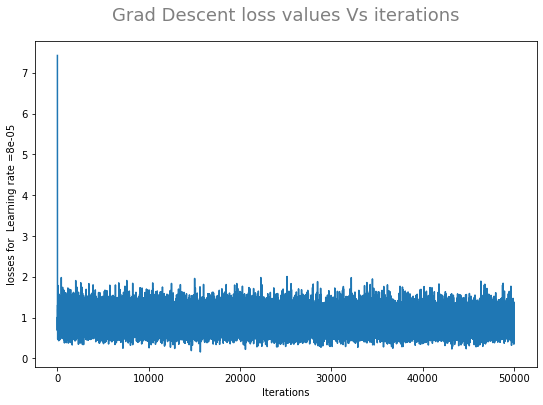

In [63]:
plot_loss(losses,alpha)

In [112]:
# Accuracy function 
def get_accuracy(y_pred,y):
    y_mean = y.mean()
    # Coeff of determination - R squared : Pearson correlation is chosen between y and y_pred
    corrmat = np.corrcoef(y.flatten(),y_pred.flatten())
    pearson_corr = corrmat[0,1]
    R_sq = pearson_corr**2
    # Mean Square Error 
    MSE = ((y - y_pred)**2).mean()
    # Root Mean Square Error 
    RMSE = np.sqrt(MSE)
    accu_dict = {"R_sq":[np.round(R_sq,2)],"RMSE":[np.round(RMSE,2)]}
    return accu_dict


In [113]:
def print_accuracy(accu_dict):
    accu_df = pd.DataFrame(accu_dict)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    pd.set_option('display.colheader_justify', 'center')
    pd.set_option('display.precision', 2)
    display(accu_df)

### MODEL TEST 

#### Train Accuracy 

In [114]:
# predict on train data 
y_pred_train = predict(X_train,theta)
# get accuracy
accu_dict_train = get_accuracy(y_pred_train,y_train)
df1 = pd.DataFrame.from_dict(accu_dict_train)
display(df1)

,R_sq,RMSE
0,0.59,3.33


#### Test Accuracy

In [115]:
# predict on test data 
y_pred_test = predict(X_test,theta)
# get accuracy
accu_dict_test = get_accuracy(y_pred_test,y_test)
df2 = pd.DataFrame.from_dict(accu_dict_test)
display(df2)

,R_sq,RMSE
0,0.68,3.02
